# Clustering Analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB
-----------------------------------------------------------------------------------------------


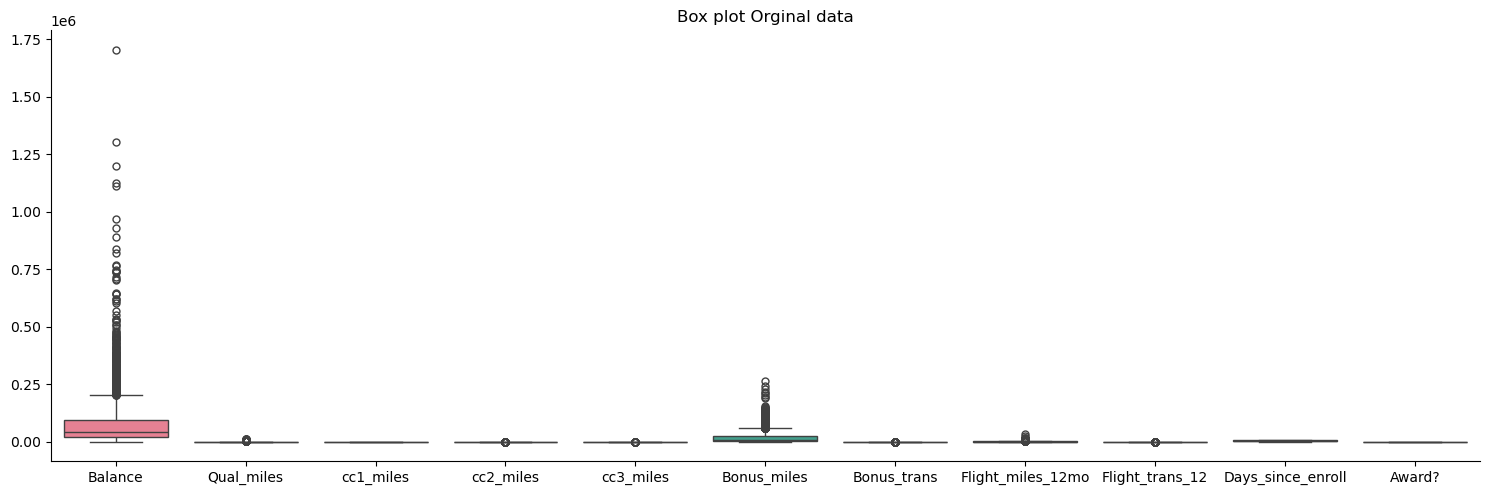

-----------------------------------------------------------------------------------------------


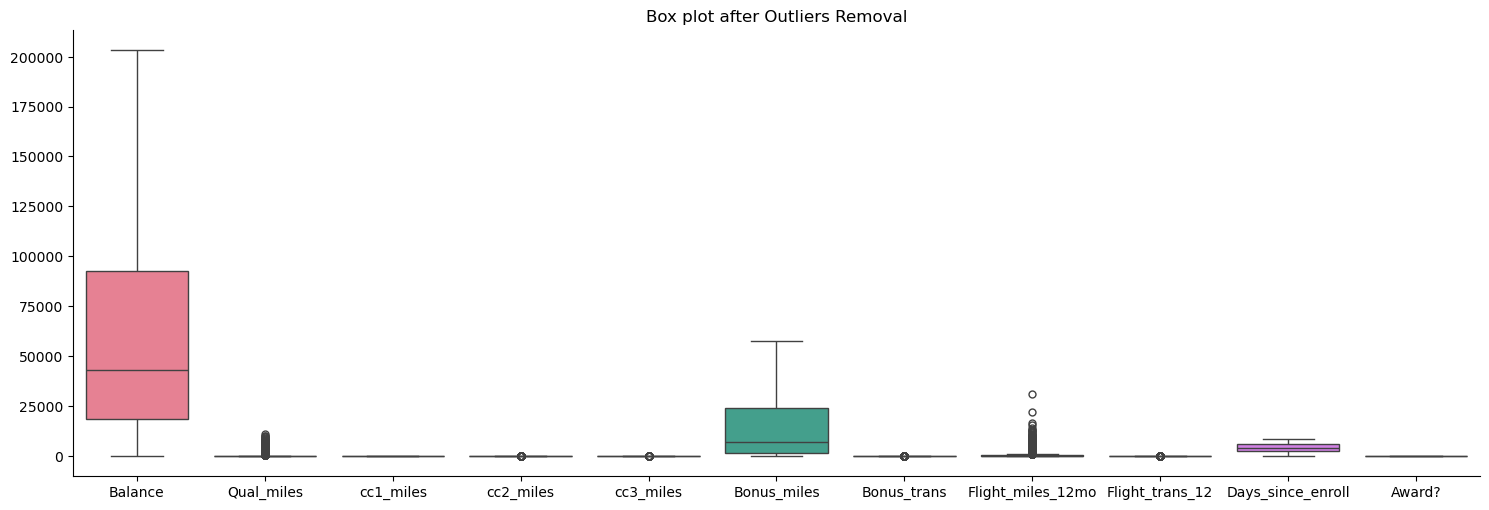

-----------------------------------------------------------------------------------------------


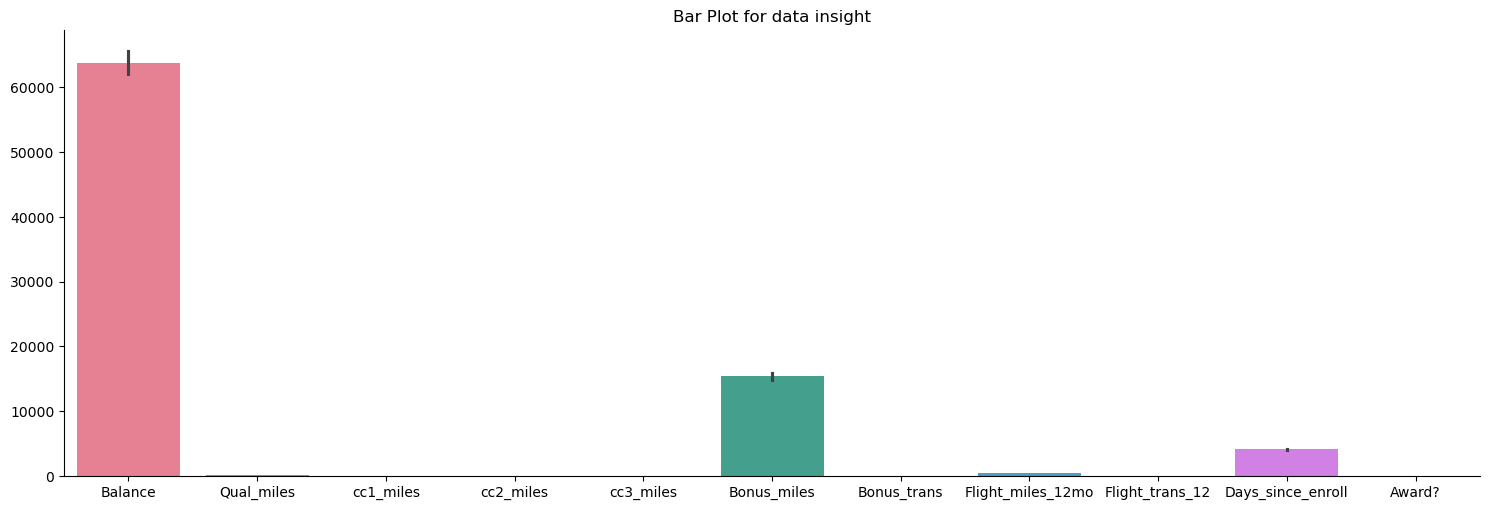

-----------------------------------------------------------------------------------------------


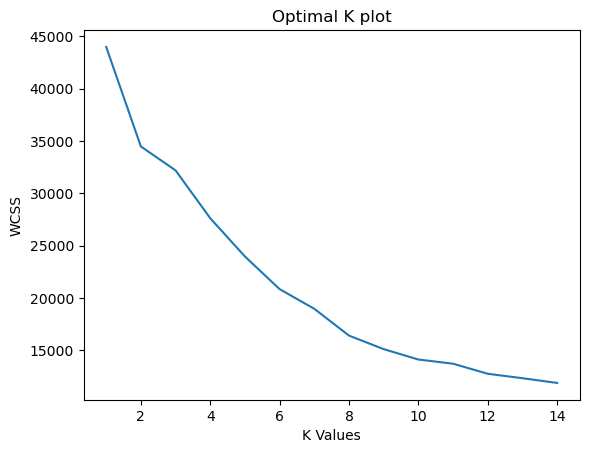

-----------------------------------------------------------------------------------------------
KMEANS
        Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
70     84409.00        5031          2          1          1     15436.00   
335   203218.75        6727          4          1          1     57313.00   
420   203218.75        7210          1          1          1     23866.00   
532    86520.00        3445          5          1          1     57626.25   
589   133445.00        8264          1          1          1      3375.00   
676    26556.00        3490          1          1          1      2845.00   
681   119082.00        5051          1          1          1      4230.00   
743   203218.75        4081          1          1          1     22750.00   
800    74924.00        6286          4          1          1     57626.25   
833   114932.00        8559          1          1          1      3150.00   
864    56606.00        3818          4          1 

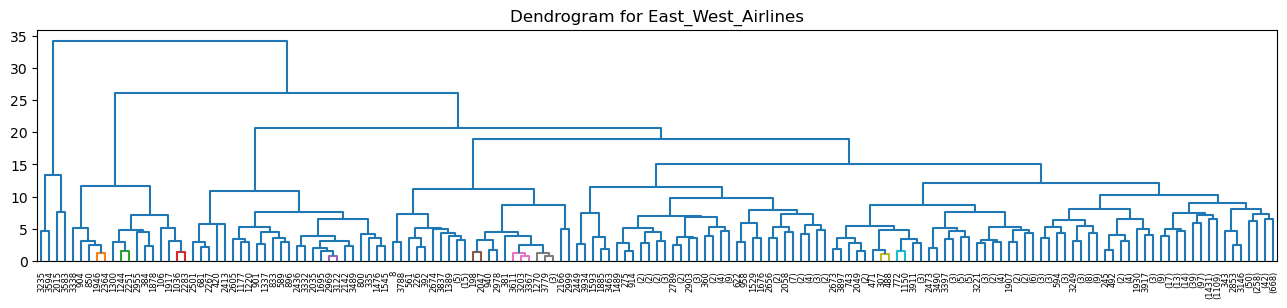

-----------------------------------------------------------------------------------------------
Silhouette_score for KMeans = 0.27605635943761037
silhouette_score for Hierarchical clustring = 0.7666152928482058
silhouette_score for DBSCAN = 0.6192297964767461
-----------------------------------------------------------------------------------------------


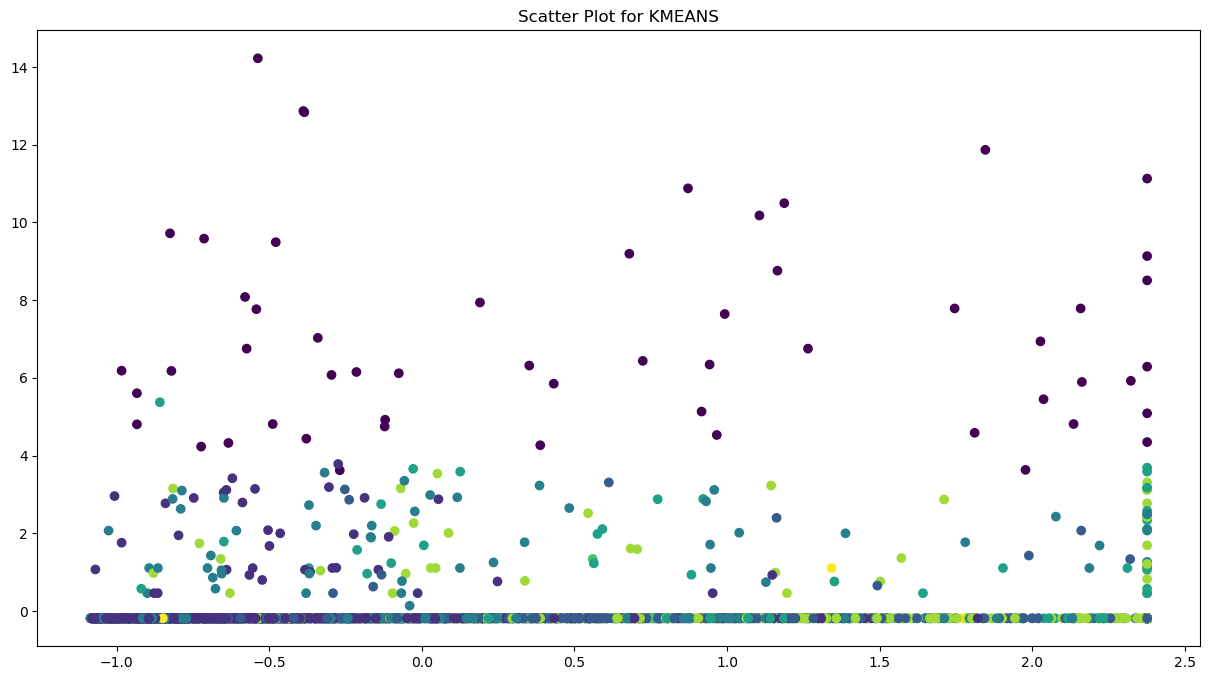

-----------------------------------------------------------------------------------------------


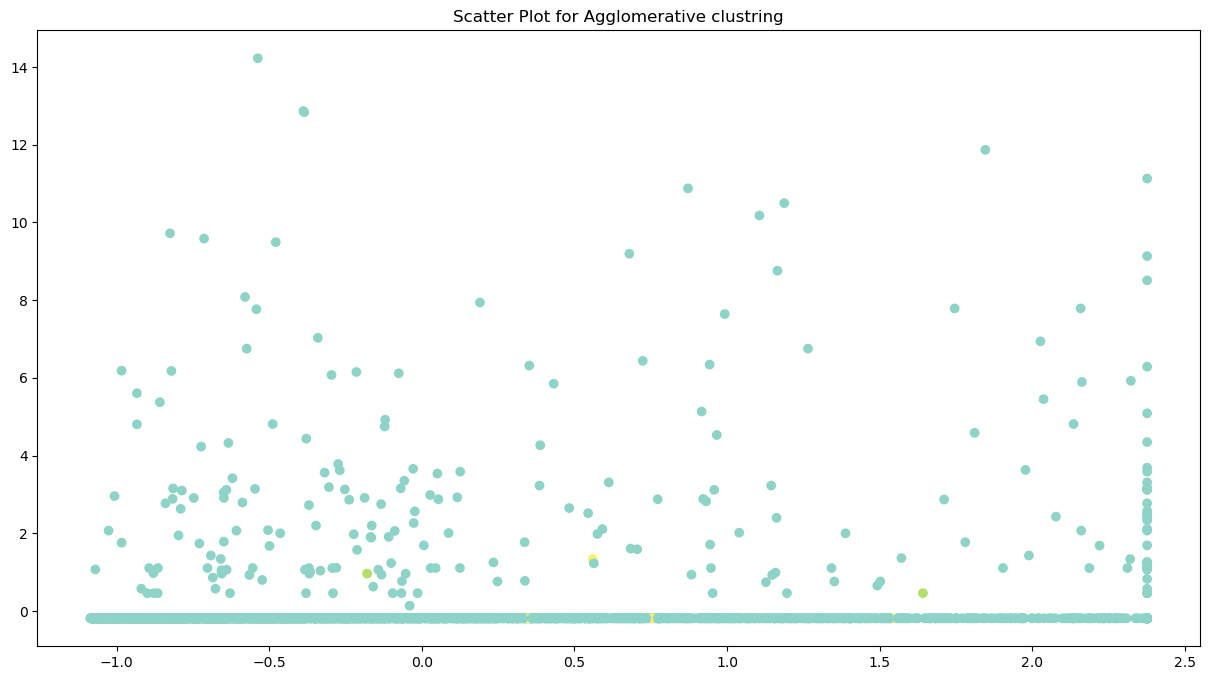

-----------------------------------------------------------------------------------------------


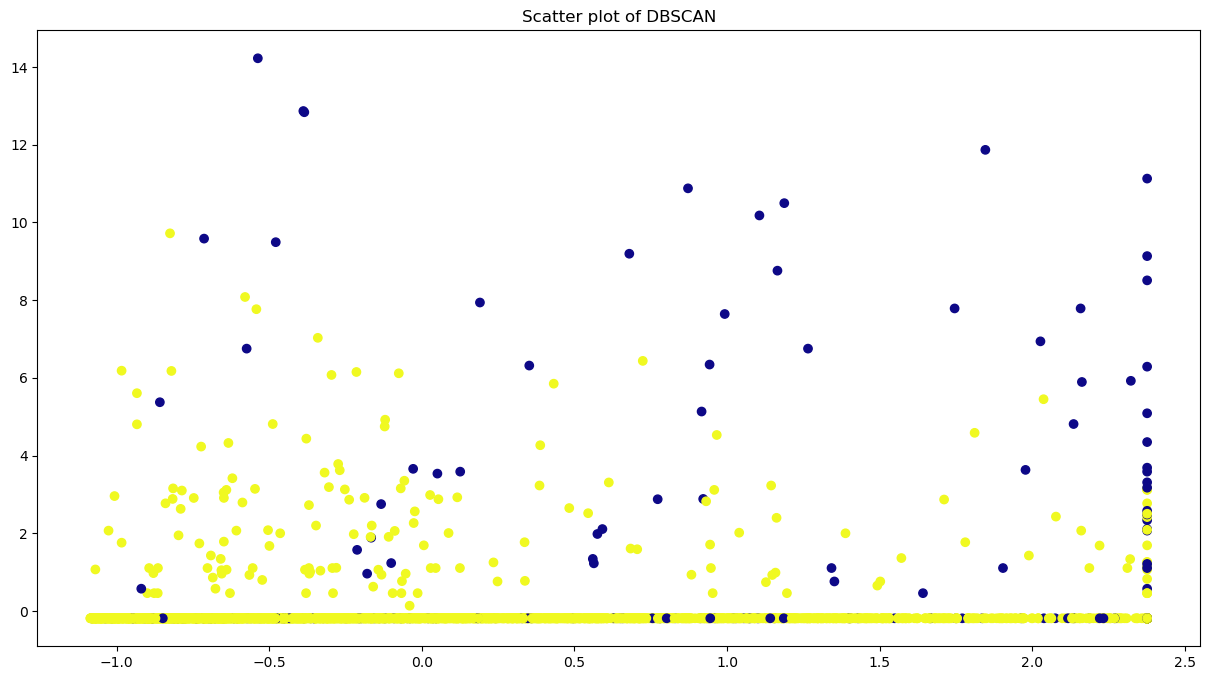

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
#Load data from Excel File
ewair=pd.read_excel('EastWestAirlines.xlsx',sheet_name='EastWestAirlines')
#inspecting Data for insight
ewair.head()
ewair.isnull().sum()
ewair.info()
print('-'*95)
ewair.describe()
ewair['Award?'].nunique()
ewair[ewair.duplicated()]
ewair=ewair.drop('ID#',axis=1)
# Visualising data for ouliers detection
sns.catplot(ewair,kind='box',height=5,aspect=3)
plt.title('Box plot Orginal data')
plt.show()
print('-'*95)
# Finding Inter Quartile Range for Balance
IQ1=ewair['Balance'].quantile(0.25)
IQ3=ewair['Balance'].quantile(0.75)
IQR=IQ3-IQ1
IQR
Ulimit=IQ3+IQR*1.5
Llimit=IQ1-IQR*1.5
ewair['Balance']=ewair['Balance'].apply(lambda x:Ulimit if x > Ulimit else x)
ewair['Balance']=ewair['Balance'].apply(lambda x:Llimit if x <= Llimit else x)
#for Bonous miles
IQ1=ewair['Bonus_miles'].quantile(0.25)
IQ3=ewair['Bonus_miles'].quantile(0.75)
IQR=IQ3-IQ1
IQR
Ulimit=IQ3+IQR*1.5
Llimit=IQ1-IQR*1.5
ewair['Bonus_miles']=ewair['Bonus_miles'].apply(lambda x:Ulimit if x > Ulimit else x)
ewair['Bonus_miles']=ewair['Bonus_miles'].apply(lambda x:Llimit if x <= Llimit else x)
ewairk=ewair.copy()
# Visualising data after Ouliers removal
sns.catplot(ewair,kind='box',height=5,aspect=3)
plt.title('Box plot after Outliers Removal')
plt.show()
print('-'*95)
sns.catplot(ewair,kind='bar',height=5,aspect=3)
plt.title('Bar Plot for data insight')
plt.show()
print('-'*95)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
# Scaling data by standardization
scale=StandardScaler()
ewair_std=scale.fit_transform(ewair)
ewair_std
# Building KMeans model
# Determining optimal k with WCSS
WCSS=[]
for i in range(1,15):
    model=KMeans(n_clusters=i)
    model.fit(ewair_std)
    WCSS.append(model.inertia_)
plt.plot(range(1,15),WCSS)
plt.title('Optimal K plot')
plt.xlabel('K Values')
plt.ylabel('WCSS')
plt.show()
print('-'*95)
# Building Actual model by optimal K
model=KMeans(n_clusters=8,random_state=42)
model.fit(ewair_std)
k_labels=model.labels_
ewairk['Labels']=model.labels_
ewairk['Labels'].nunique()
ewairk.head(5)
grp=ewairk.groupby('Labels')
print('KMEANS')
for x,y in grp:
    print(y)
    print('='*98)
d=grp.agg('mean')
print(d.sort_values(by='Balance'))
print('-'*95)
# Building Hierarchical Clustring Agglomerative model
from sklearn.cluster import AgglomerativeClustering
ewairh=ewair.copy()
aglmodel=AgglomerativeClustering(n_clusters=3,linkage='complete')
aglmodel.fit(ewair_std)
ewairh['label']=aglmodel.labels_
grp=ewairh.groupby('label')
grp.agg('mean')
print(grp)
print('-'*95)
print('AgglomerativeClustering')
for x,y in grp:
    print(y)
    print('-'*98)
print('-'*95)
# Ploting Dendrogram
from scipy.cluster import hierarchy
hr=hierarchy.linkage(ewair_std,method='complete')
plt.figure(figsize=(16,3))
dr=hierarchy.dendrogram(hr,color_threshold=1.5,truncate_mode='level',p=10,leaf_rotation=90,leaf_font_size=6)
plt.title('Dendrogram for East_West_Airlines')
plt.show()
print('-'*95)
# Building DBSCAN model
from sklearn.cluster import DBSCAN
ewaird=ewair.copy()
dbscan=DBSCAN(metric='manhattan',eps=6,min_samples=200)
dbscan.fit(ewair_std)
ewaird['labels']=dbscan.labels_
# Evaluating model by silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(ewair_std,ewairk['Labels'])
silhouette_score(ewair_std,ewairh['label'])
silhouette_score(ewair_std,ewaird['labels'])
print(f'Silhouette_score for KMeans = {silhouette_score(ewair_std,ewairk['Labels'])}')
print(f'silhouette_score for Hierarchical clustring = {silhouette_score(ewair_std,ewairh['label'])}')
print(f'silhouette_score for DBSCAN = {silhouette_score(ewair_std,ewaird['labels'])}')
print('-'*95)
# Ploting KMeans model 
plt.figure(figsize=(15,8))
plt.scatter(ewair_std[:,0],ewair_std[:,1],c=ewairk['Labels'],cmap='viridis')
plt.title('Scatter Plot for KMEANS')
plt.show()
print('-'*95)
# ploting Agglomerative Model
plt.figure(figsize=(15,8))
plt.scatter(ewair_std[:,0],ewair_std[:,1],c=ewairh['label'],cmap='Set3')
plt.title('Scatter Plot for Agglomerative clustring')
plt.show()
print('-'*95)
# Ploting DBSCAN Model
plt.figure(figsize=(15,8))
plt.scatter(ewair_std[:,0],ewair_std[:,1],c=ewaird['labels'],cmap='plasma')
plt.title('Scatter plot of DBSCAN')
plt.show()

#### Insight gained from scatter plot
    1.Kmeans:
        Clusters appear compact, but some points are misclassified due to minute outliers. K-Means struggles with irregular cluster shapes.
        
    2.Hierarchical Clustring:
        Clusters seems to be well clustered and hierarchical capturing density,but lack of distinct boundries.
        
    3.DBSCAN:
        Clearly identifies dense regions and isolates noise points, but struggles with varying densities in some areas.
        
    DBSCAN is effective for noise detection, while K-Means and Agglomerative perform well for compact structures.